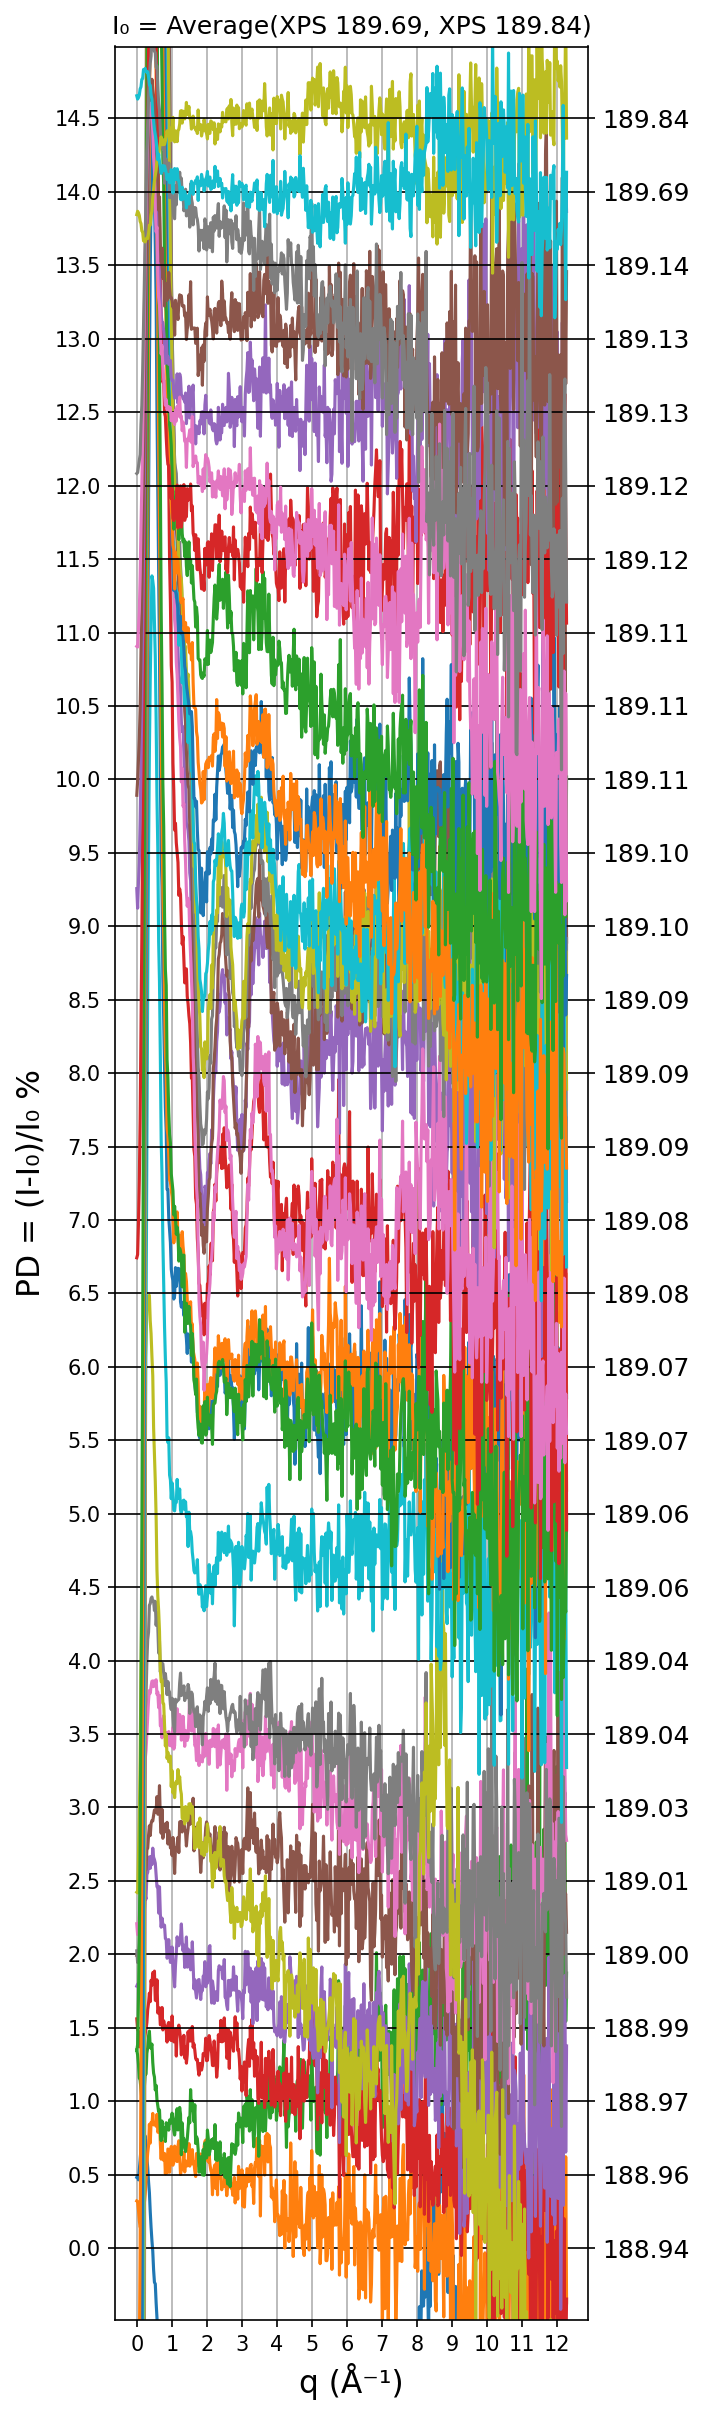

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def PD_water_fall_normal(analyze_dir: str, STP: float = 0.5, amp: float = 1.0):
    """
    Waterfall plot with normal order (not reversed).
    """
    analyze_path = Path(analyze_dir)
    
    # Find all filtered parquet files
    filtered_files = list(analyze_path.rglob("filtered_xps_*.parquet"))
    
    # Filter groups with >1000 data points
    valid_groups = []
    for file_path in filtered_files:
        df = pd.read_parquet(file_path)
        if len(df) >= 1000:
            xps_value = float(file_path.stem.replace('filtered_xps_', ''))
            valid_groups.append((xps_value, file_path, df))
    
    if not valid_groups:
        return
    
    # Sort by XPS value
    valid_groups.sort(key=lambda x: x[0])
    
    # Find reference groups
    ref_group_1 = None
    ref_group_2 = None
    for xps_value, file_path, df in valid_groups:
        if abs(xps_value - 189.69) < 0.01:
            ref_group_1 = (xps_value, file_path, df)
        elif abs(xps_value - 189.84) < 0.01:
            ref_group_2 = (xps_value, file_path, df)
    
    if ref_group_1 is None or ref_group_2 is None:
        print("Reference groups not found")
        return
    
    # Calculate I0
    radial_columns = [col for col in ref_group_1[2].columns if col.startswith('radial_bin_')]
    I0_profile_1 = ref_group_1[2][radial_columns].mean()
    I0_profile_2 = ref_group_2[2][radial_columns].mean()
    I0 = (I0_profile_1 + I0_profile_2) / 2
    
    s = np.array([int(col.split('_')[-1]) for col in radial_columns]) * 0.024
    
    # Calculate percentage differences
    PD = []
    xps_times = []
    
    for xps_value, file_path, df in valid_groups:
        I_profile = df[radial_columns].mean()
        pd_values = ((I_profile - I0) / I0) * 100
        PD.append(pd_values.values)
        xps_times.append(xps_value)
    
    PD = np.array(PD)
    N = len(PD)
    
    # Create plot (normal order, not reversed)
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(111)
    ax2 = fig.add_subplot(111, frame_on=False)
    fig.set_size_inches(8 * 0.6, N * 0.9 * 0.6 * amp)
    
    T = [0 for i in range(N + 2)]
    for i in range(N):
        T[i + 1] = xps_times[i]  # Normal order
        ax.plot(s, PD[i] + i * STP)
        ax.axhline(y=i * STP, linewidth='0.8', color='black')
    
    ax.set_xlabel('q (Å⁻¹)', fontsize='15')
    ax.set_xticks(np.arange(0, 1 + np.round(s.max(), 0)))
    
    left = [0 for i in range(len(T))]
    for i in range(len(T)):
        left[i] = f'{T[i]:.2f}'
    left = np.array(left)
    
    ax.set_yticks(np.arange(-2, N) * STP)
    plt.yticks(np.arange(-1, N + 1) * STP, left, fontsize='12')
    ax2.yaxis.tick_right()
    ax2.set_xticks([])
    ax.set_ylim(-(STP - 0.01), STP * N - 0.01)
    ax2.set_ylim(-(STP - 0.01), STP * N - 0.01)
    ax.set_ylabel('PD = (I-I₀)/I₀ %', fontsize='15')
    ax.grid(axis='x')
    
    plt.title(f'I₀ = Average(XPS {ref_group_1[0]:.2f}, XPS {ref_group_2[0]:.2f})', fontsize=12)
    plt.tight_layout()
    
    output_path = analyze_path / "PD_waterfall_normal.png"
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.show()

# Usage example:
if __name__ == "__main__":
    analyze_directory = r"C:\Users\86177\Desktop\0809\analysis_parallel_time"
    
    # Waterfall plot with normal order
    PD_water_fall_normal(analyze_directory, STP=1, amp=1.0)

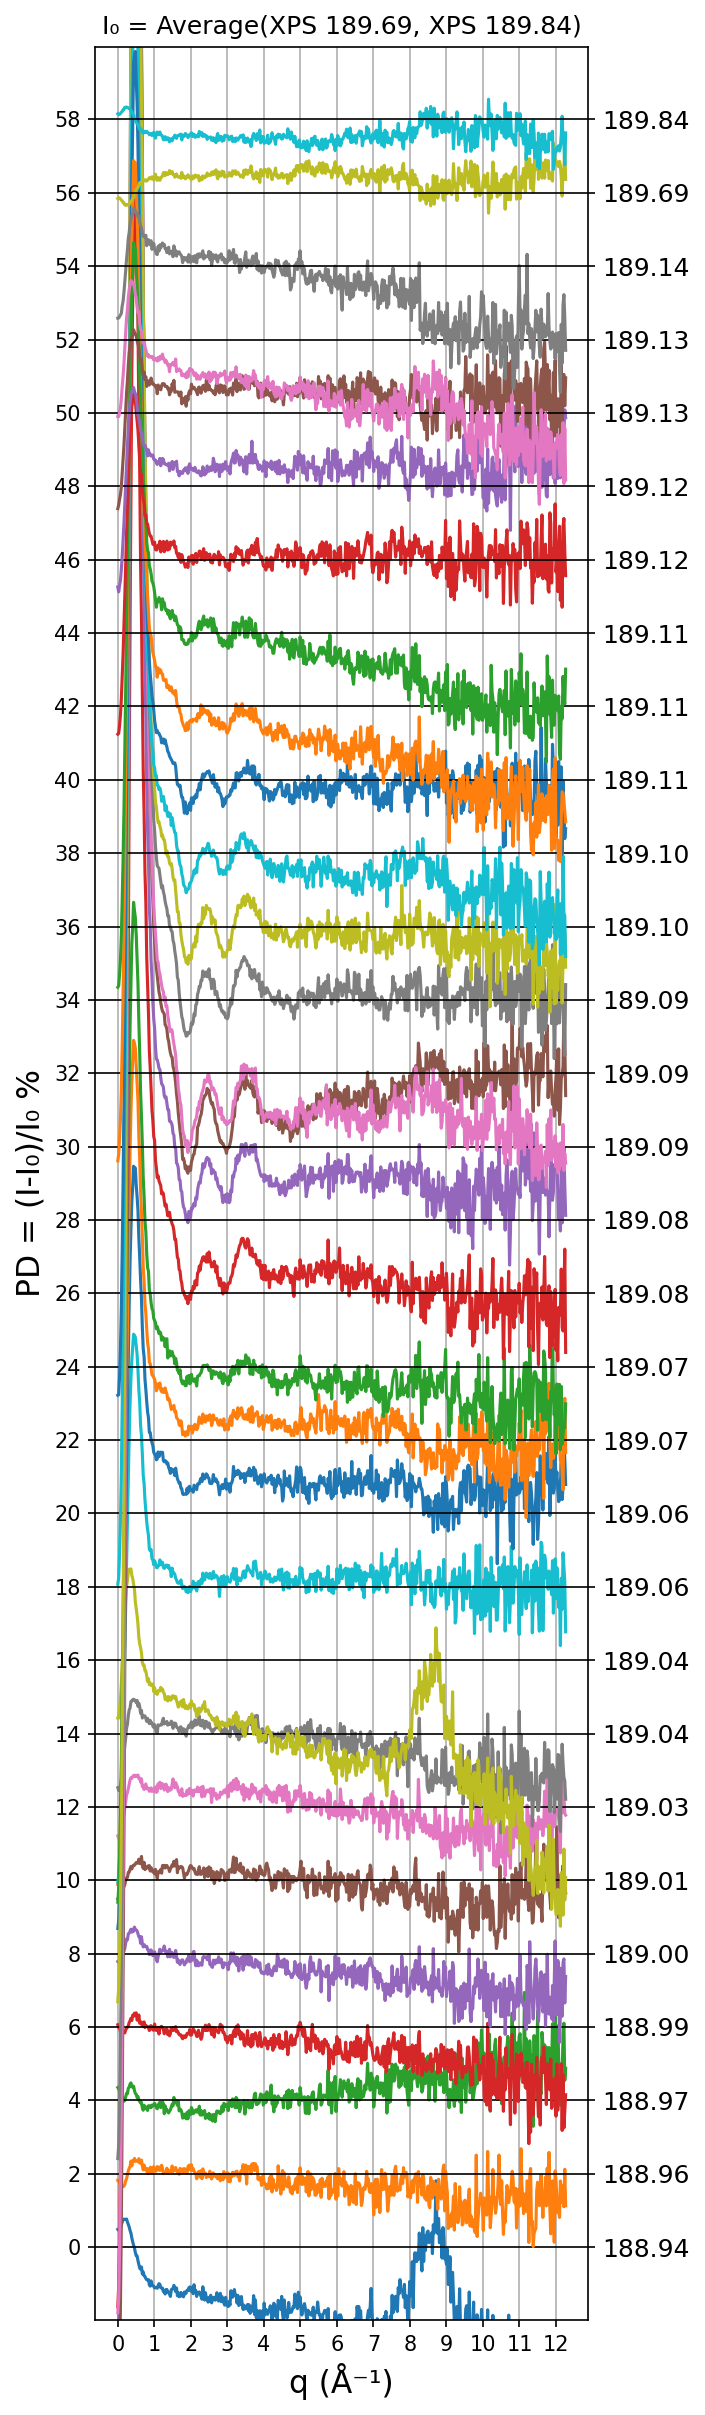

In [4]:
PD_water_fall_normal(analyze_directory, STP=2, amp=1.0)